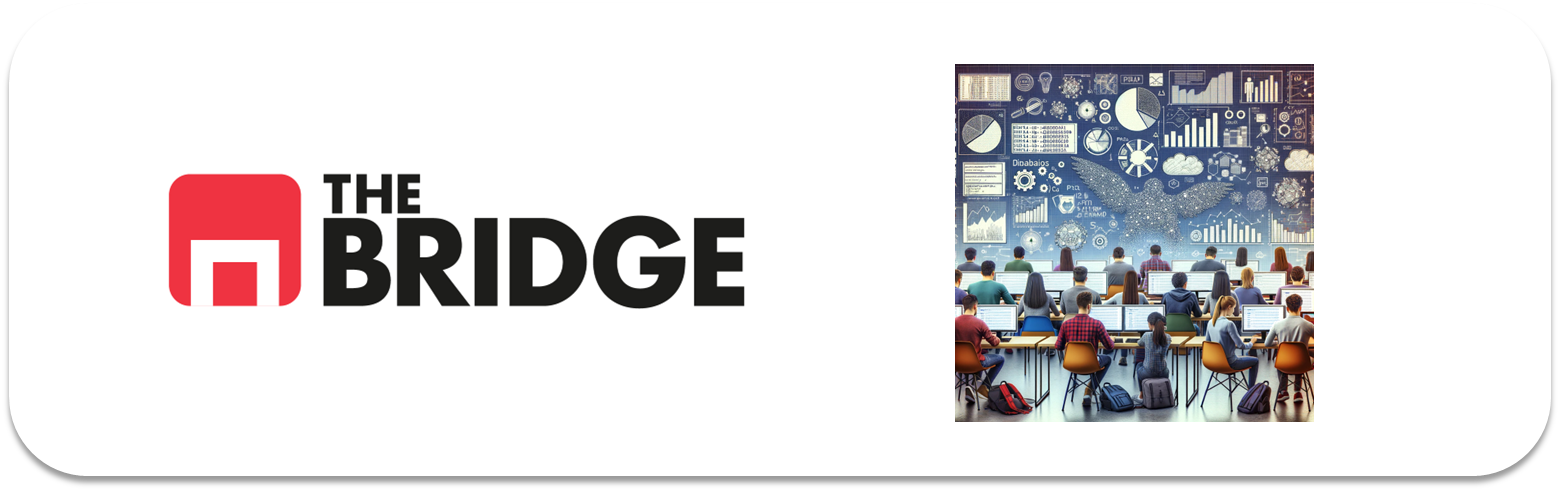

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [1]:
# Importamos las posibles librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet

from bootcampviztools import plot_combined_graphs

In [2]:
# Cargamos el dataset y pegamos un vistazo de los datos

df = pd.read_csv("obligatoria_hard.csv", delimiter = "|")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [3]:
# Comprobamos la información de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


*No hay valores nulos y todas las variables son numéricas, por lo que no habría que tratar ninguna variable categórica*

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Escogemos la variable "Target" y la analizamos visualmente

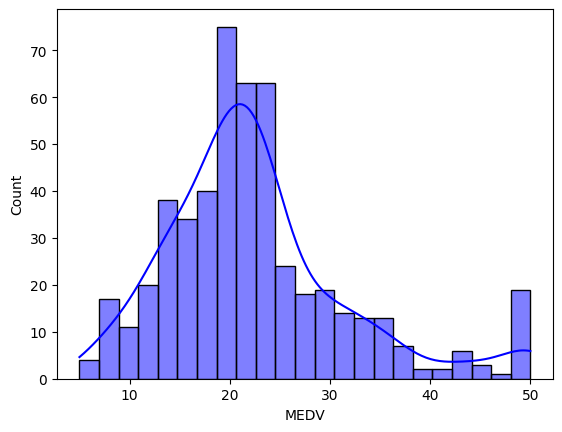

In [5]:
# Comprobamos la distribución de la variable target

sns.histplot(df["MEDV"], color='Blue', kde = True)
plt.show()

*La variable "Target" es "MEDV". Tiene una distribución que se asemeja bastante a una normal, aunque tiene un poco de cola. Asumimos que se puede aplicar una regresión lineal*

Hacemos el split entre train y test

In [6]:
# Dividimos entre train y test

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Definimos la variable Target en una variable concreta

target = "MEDV"

# Generamos las parejas X,y de train y test

X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


Hacemos un mini EDA de los datos de train

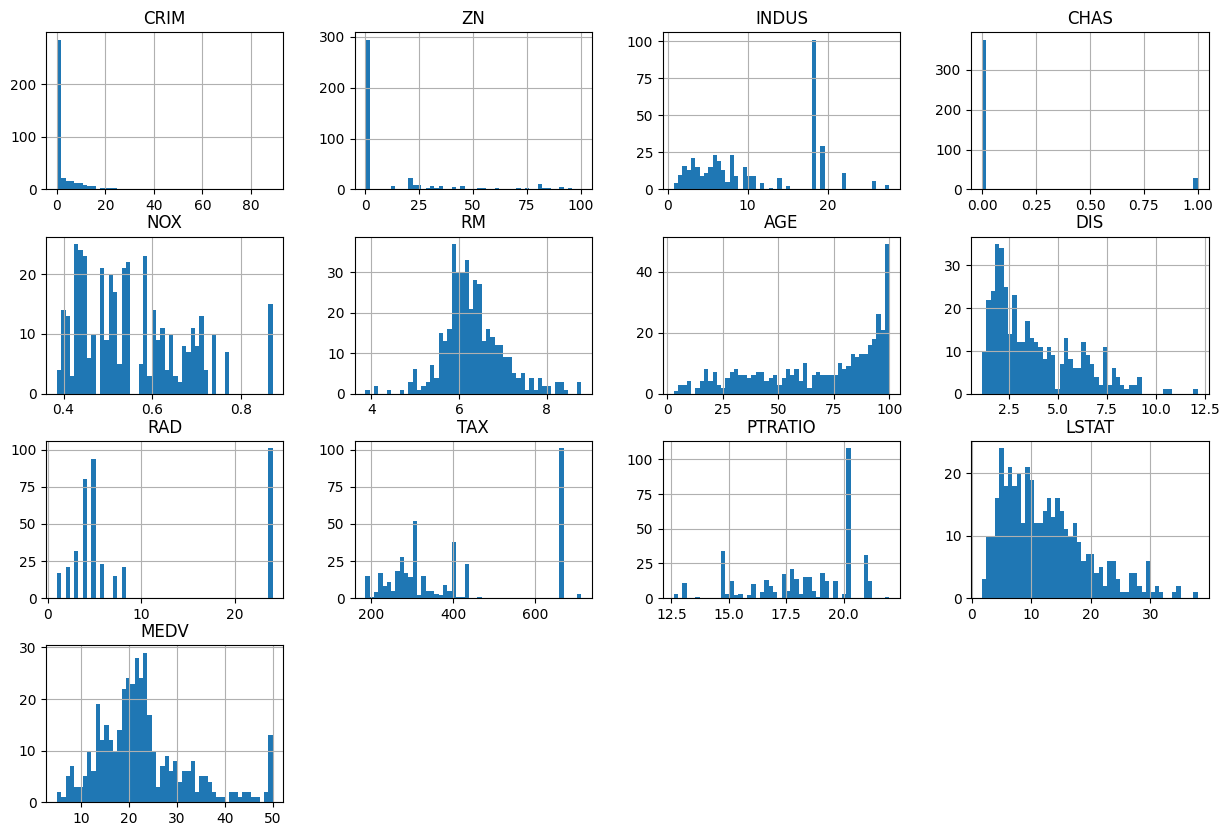

In [8]:
train_set.hist(bins=50, figsize=(15, 10)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [9]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

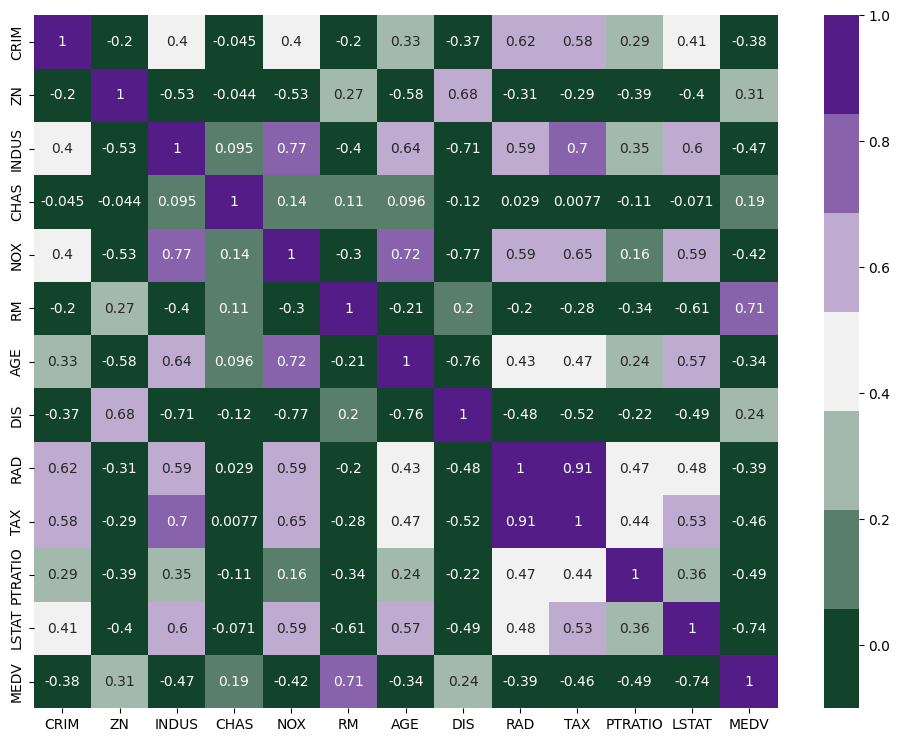

In [10]:
# Comprobamos las correlaciones entre las variables

plt.figure(figsize=(12, 9))
sns.heatmap(train_set.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

*Aunque las variables más relacionadas con la variable target "MEDV" son "RM" (0.71) y "LSTAT" (-0.74), nos vamos a quedar con todas las variables como features* \
*No nos vamos a anticipar a eliminar variables que no conocemos en exceso antes de aplicar el modelo de Machine Learning*

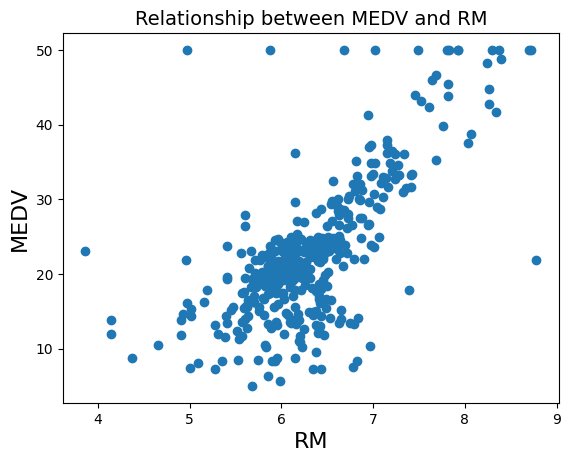

In [11]:
# Vamos a mostrar gráficamente la relación entre la respuesta MEDV y la característica RM

plt.scatter(train_set['RM'], train_set['MEDV'])
plt.xlabel('RM', fontsize=16)
plt.ylabel('MEDV', fontsize=16)
plt.title("Relationship between MEDV and RM", fontsize=14)
plt.show()

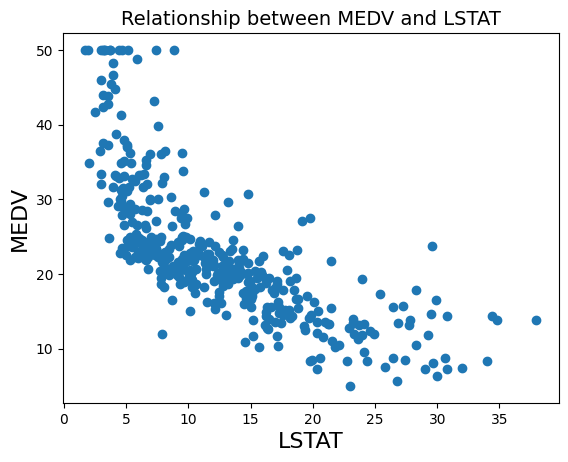

In [12]:
# Y lo mismo para MEDV y la característica LSTAT

plt.scatter(train_set['LSTAT'], train_set['MEDV'])
plt.xlabel('LSTAT', fontsize=16)
plt.ylabel('MEDV', fontsize=16)
plt.title("Relationship between MEDV and LSTAT", fontsize=14)
plt.show()

Tratamos las variables continuas para que se adapten lo mejor posible al modelo

In [13]:
train_set.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

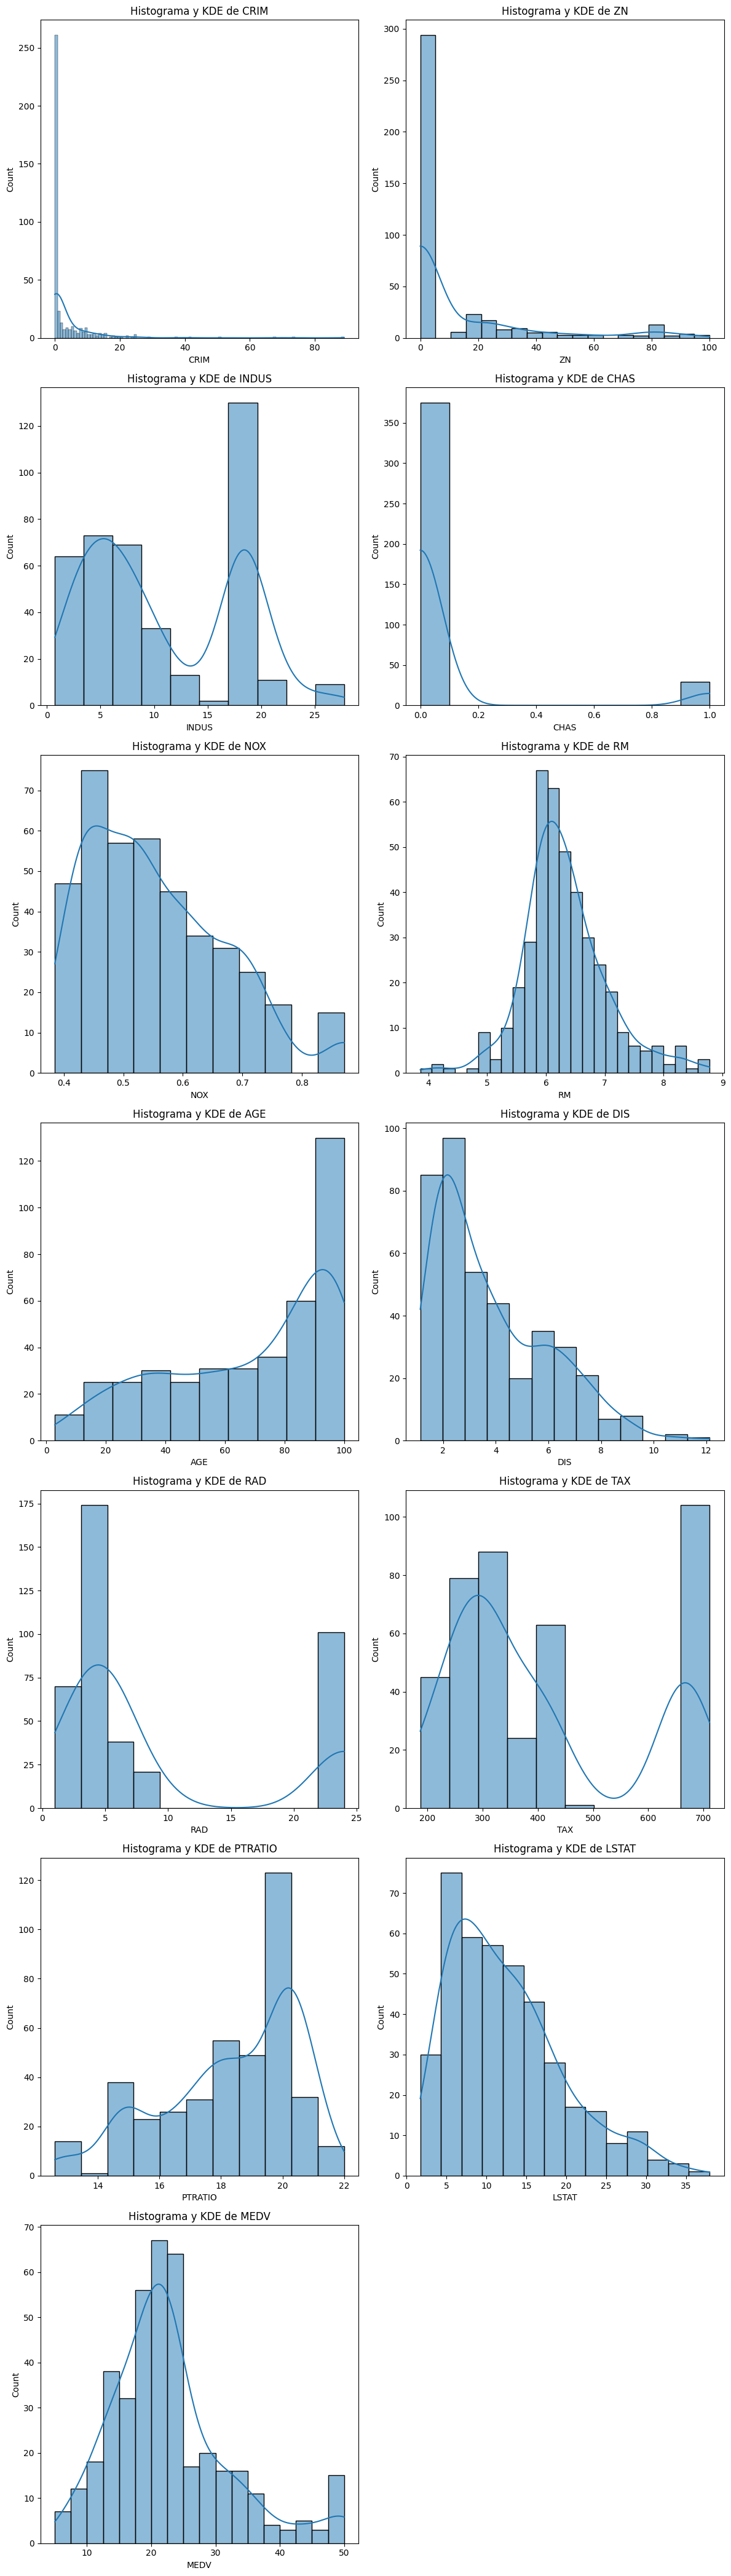

In [15]:
plot_histo_den(train_set, train_set.columns)

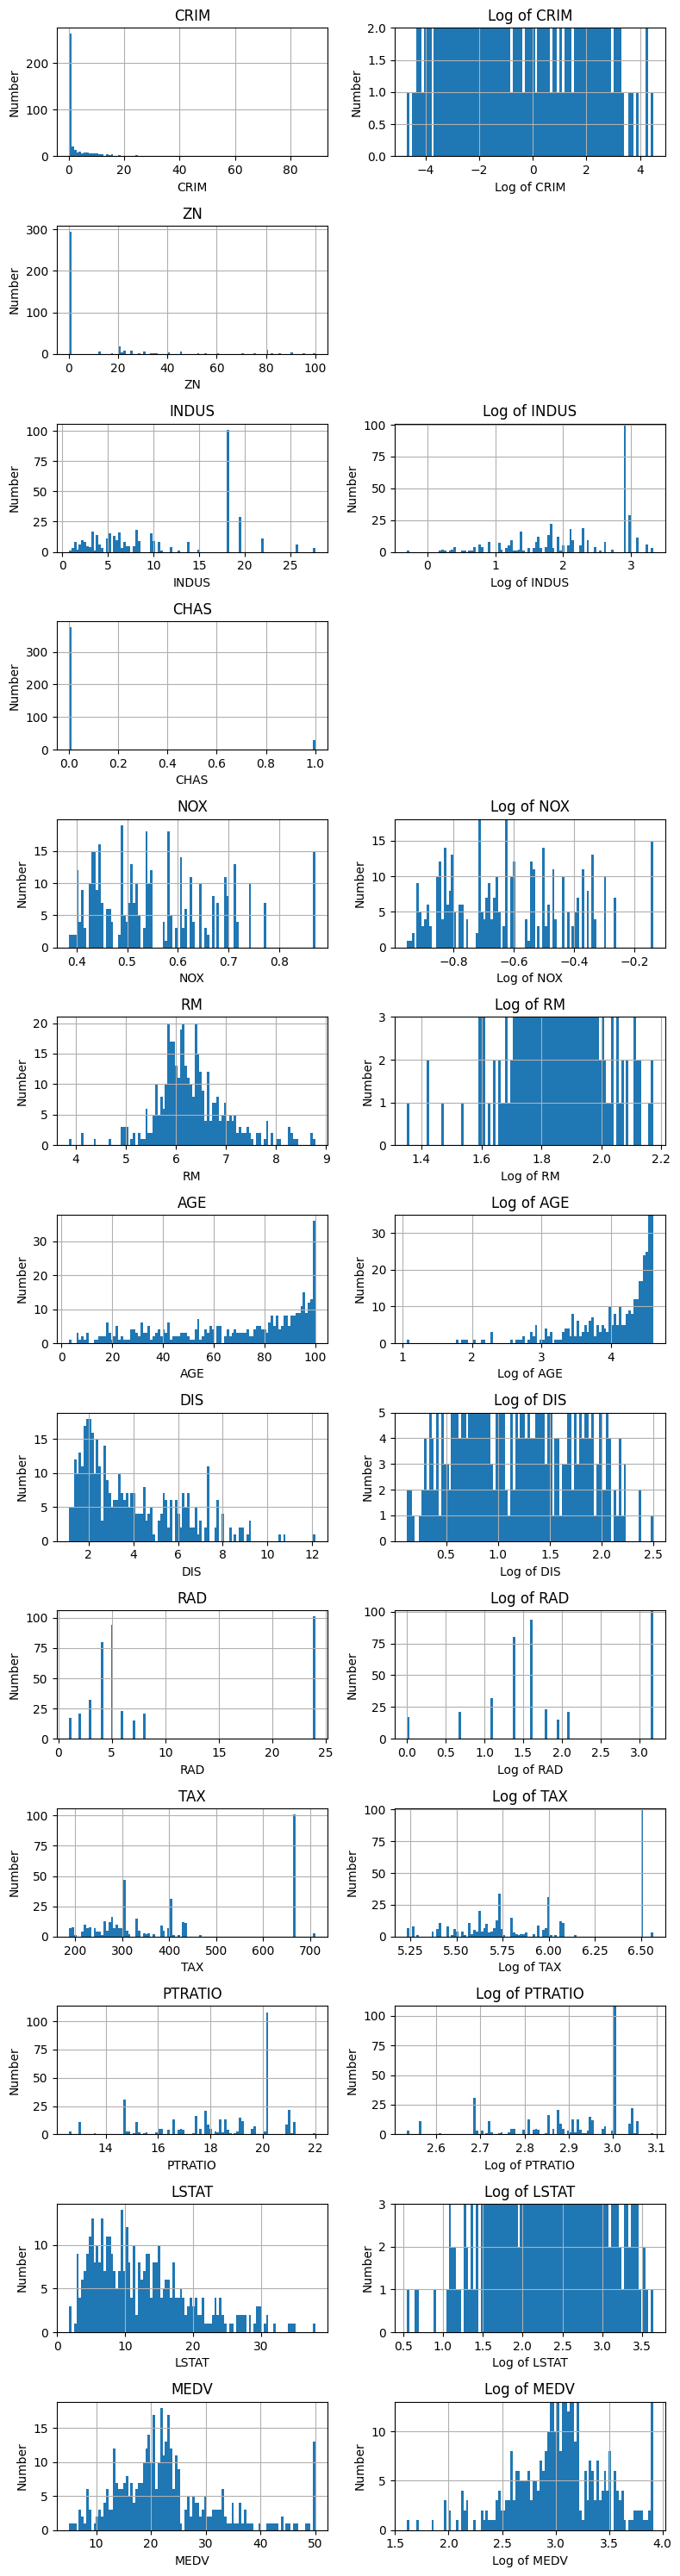

In [16]:
fig, axs = plt.subplots(13, 2, figsize=(8, 30), sharey=False)  # No compartir el eje y

# Iterar sobre las columnas y asignar gráficos
for i, columna in enumerate(train_set.columns):
    if i >= 13:  # Limitar el número de filas a las disponibles en los subplots
        break
    
    # Gráfico original en la primera columna
    train_set[columna].hist(ax=axs[i, 0], bins=100)
    axs[i, 0].set_title(f"{columna}")
    axs[i, 0].set_xlabel(columna)
    axs[i, 0].set_ylabel("Number")
    
    # Gráfico del logaritmo en la segunda columna (si es aplicable)
    if (train_set[columna] > 0).all():  # Verificar que no haya valores <= 0
        log_data = train_set[columna].apply(np.log)
        log_data.hist(ax=axs[i, 1], bins=100)
        axs[i, 1].set_title(f"Log of {columna}")
        axs[i, 1].set_xlabel(f"Log of {columna}")
        axs[i, 1].set_ylabel("Number")
        
        # Ajustar la escala del eje y
        max_y = log_data.value_counts().max()  # Obtener el valor máximo de frecuencia
        margin = max_y * 0.1  # Calcular un margen del 10%
        axs[i, 1].set_ylim(0, max_y)  # Añadir el margen al límite superior
    else:
        axs[i, 1].set_visible(False)  # Ocultar subplot si no se puede calcular el logaritmo

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()

*Distribuciones más o menos normales serían las variables "RM", "LSTAT" y "MEDV". El resto no parecen seguirla, se deberían transformar pero lo vamos a dejar así*

(2,)


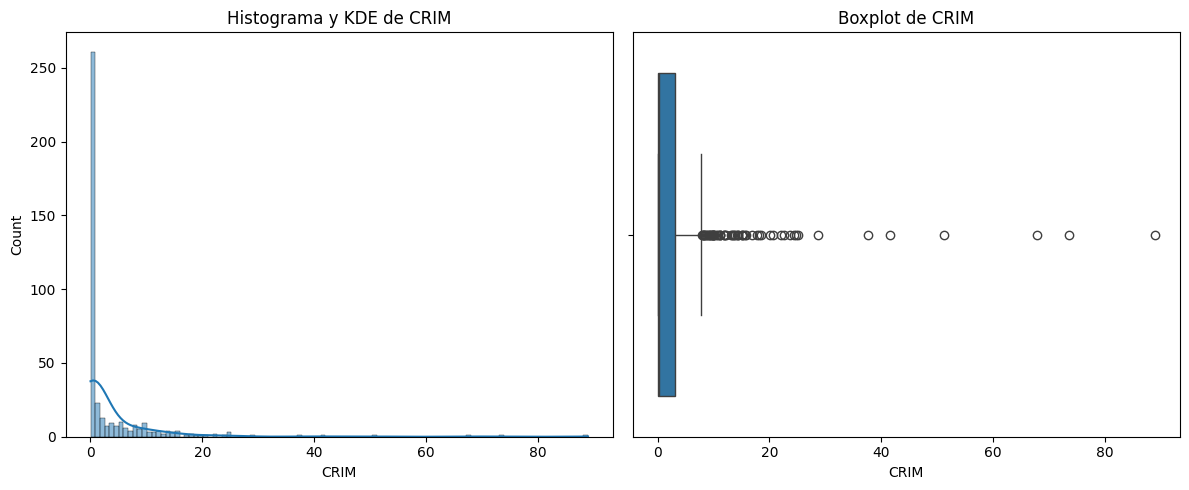

(2,)


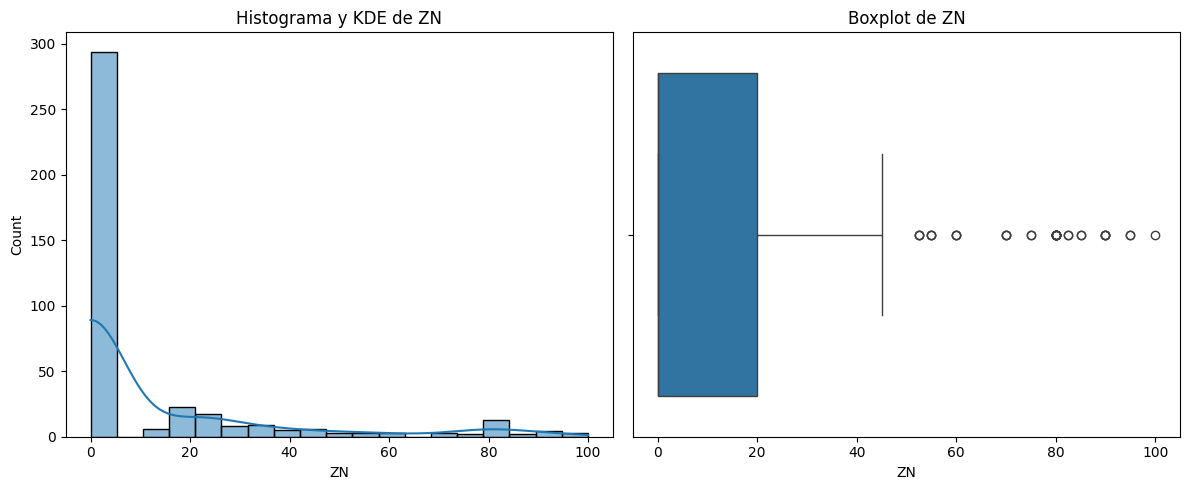

(2,)


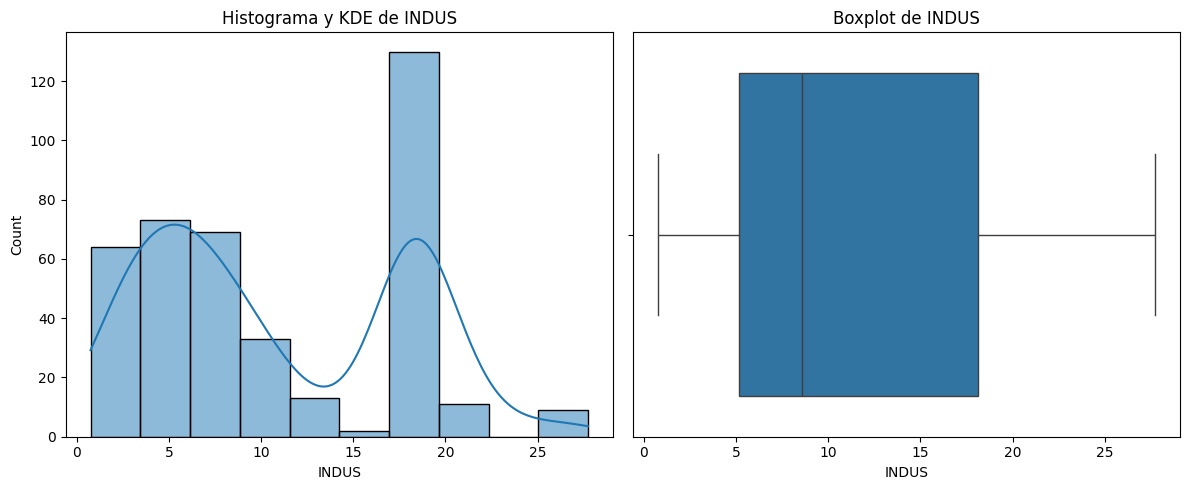

(2,)


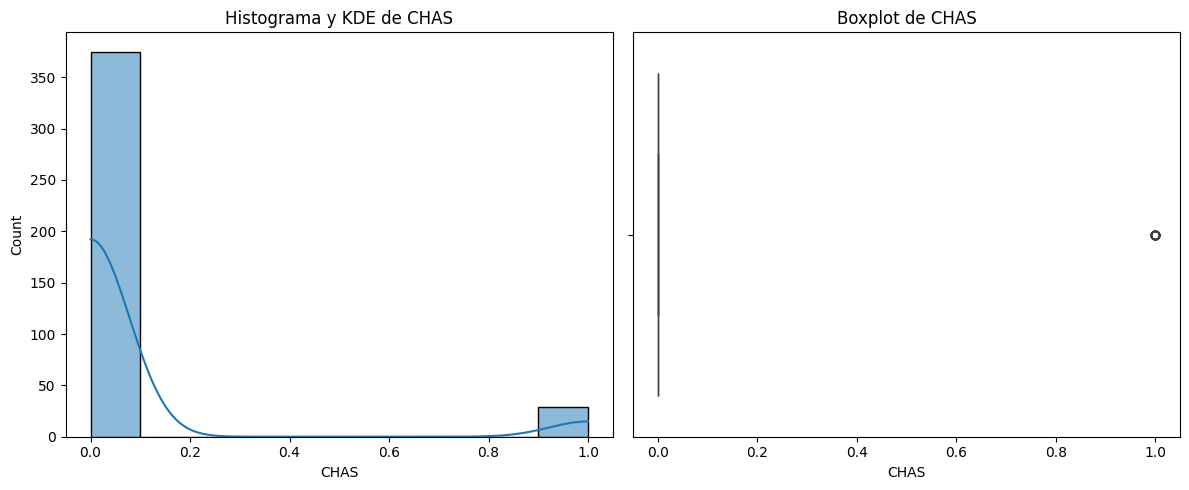

(2,)


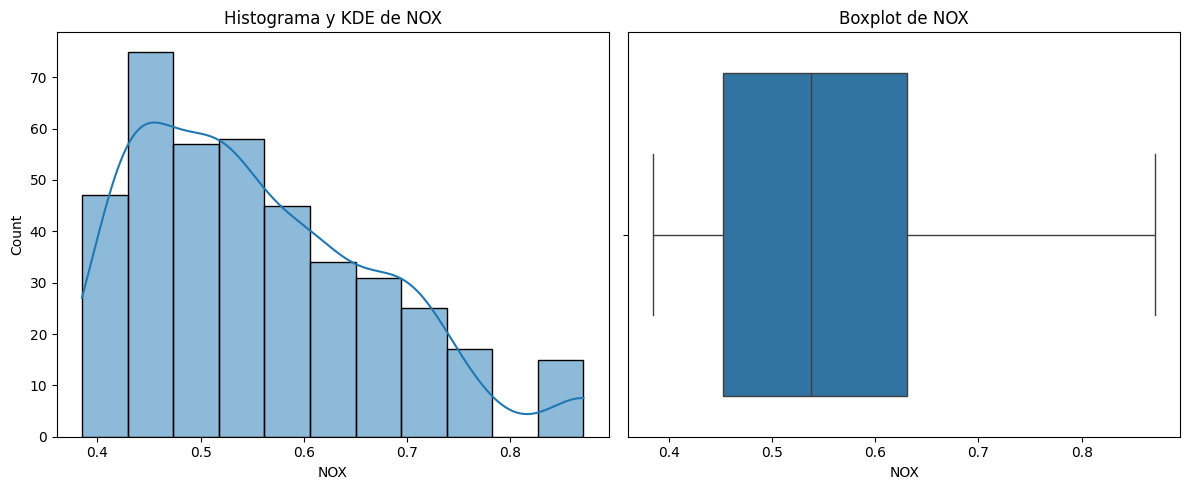

(2,)


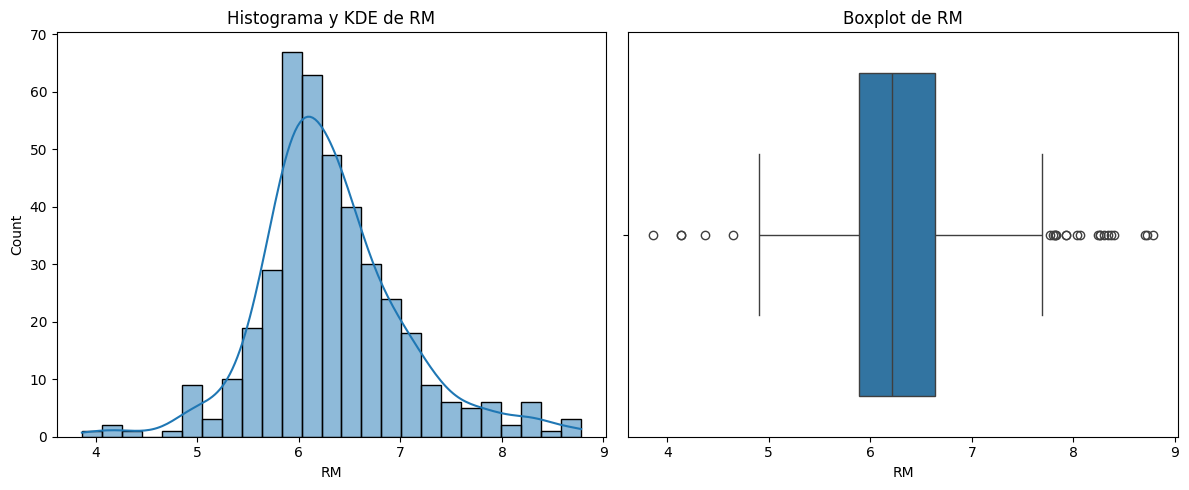

(2,)


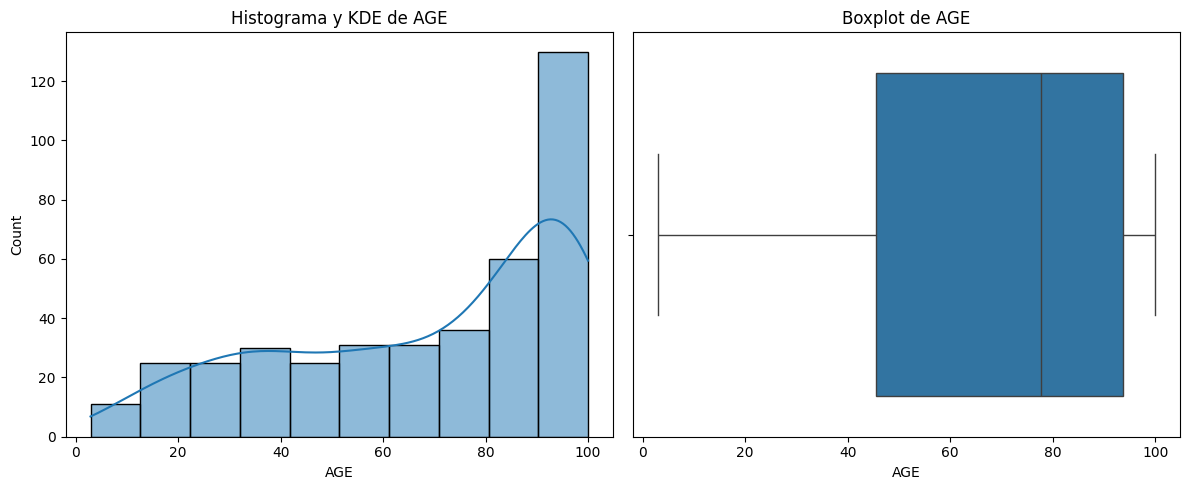

(2,)


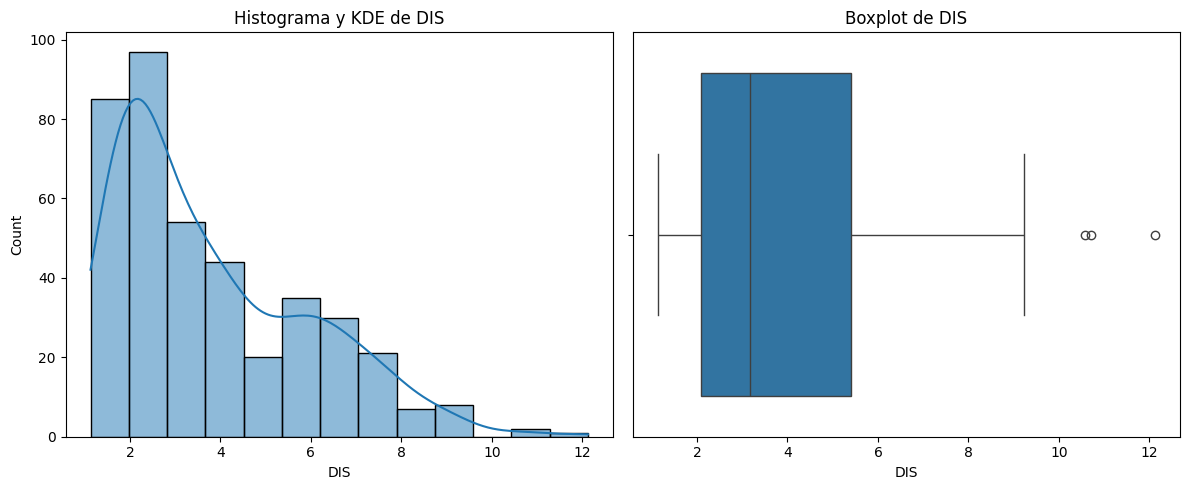

(2,)


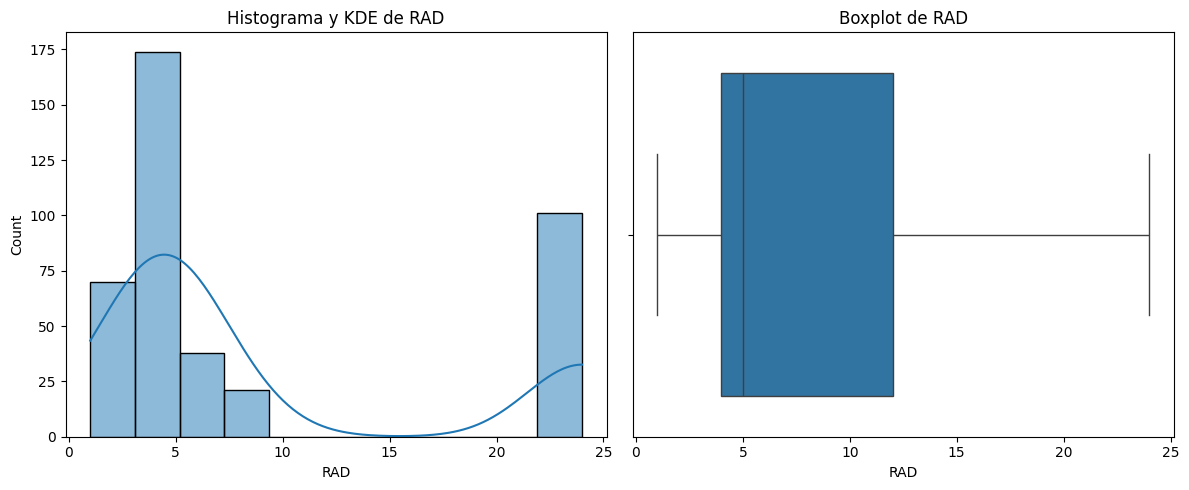

(2,)


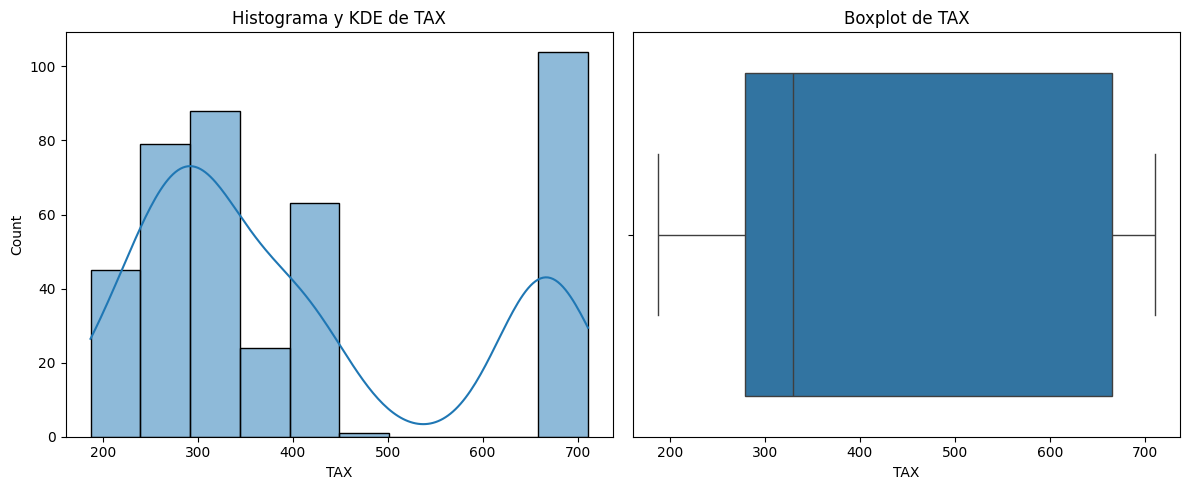

(2,)


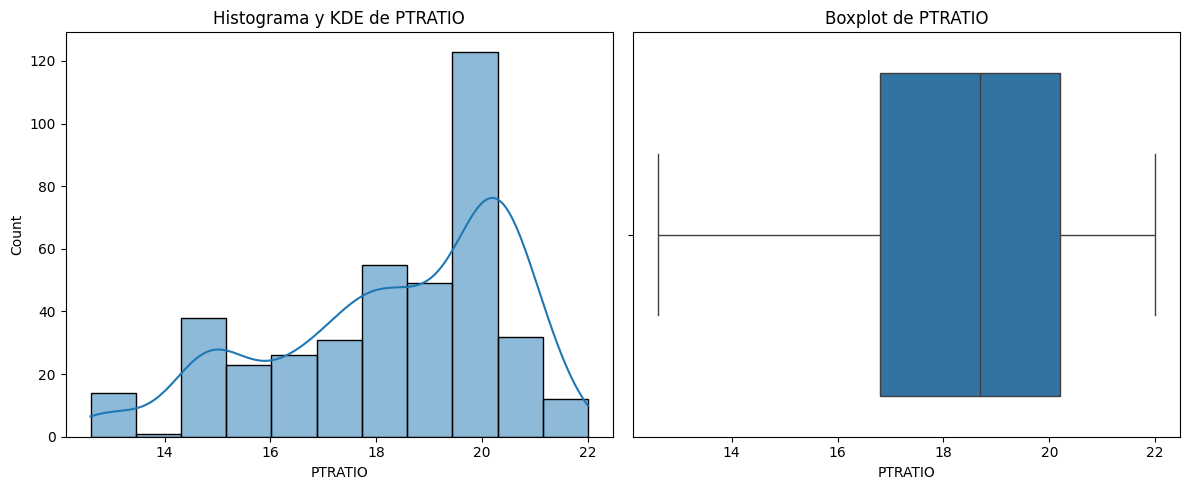

(2,)


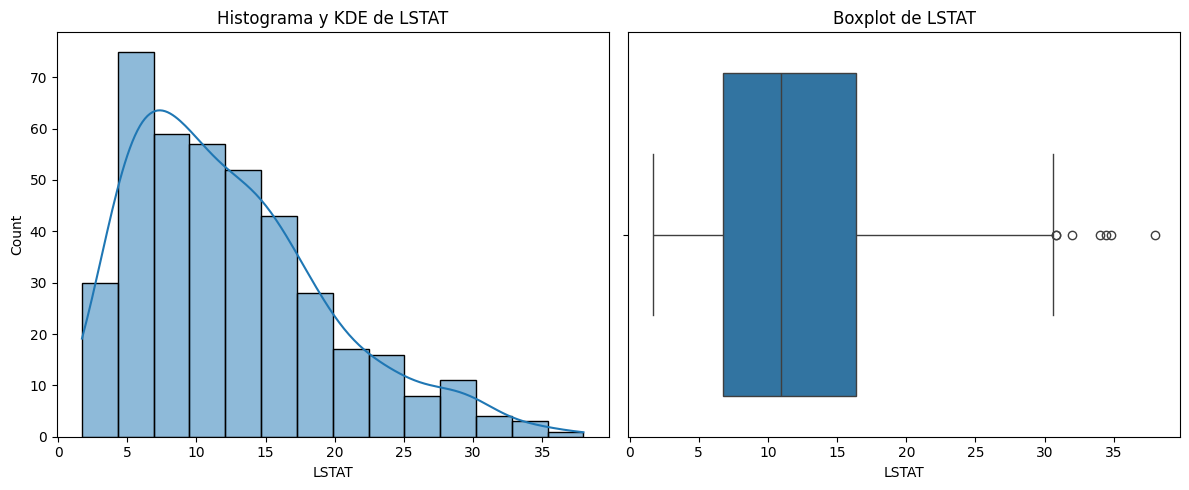

(2,)


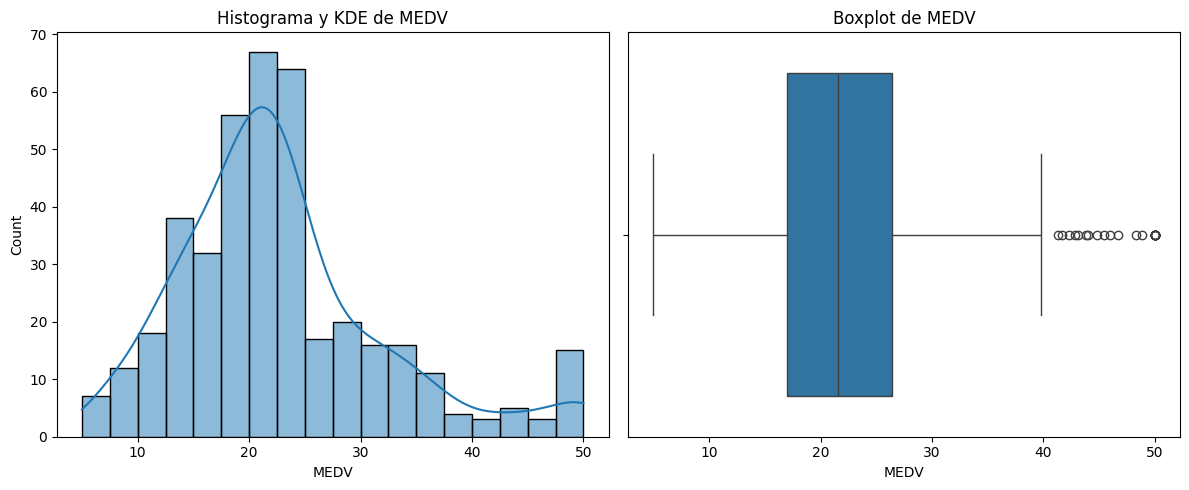

In [17]:
for columna in train_set.columns:
    plot_combined_graphs(train_set, [columna])

*También hay bastantes outliers que se deberían tratar cuando veamos cómo hacerlo, por el momento lo dejamos así*

Estandarizamos los datos

In [18]:
# Vamos a intentar realizar la estandarización 

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

for columna in train_set.columns:
    train_set[columna] = std_scaler.fit_transform(train_set[[columna]])

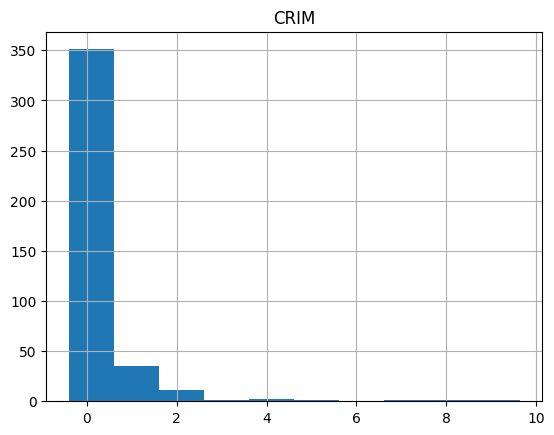

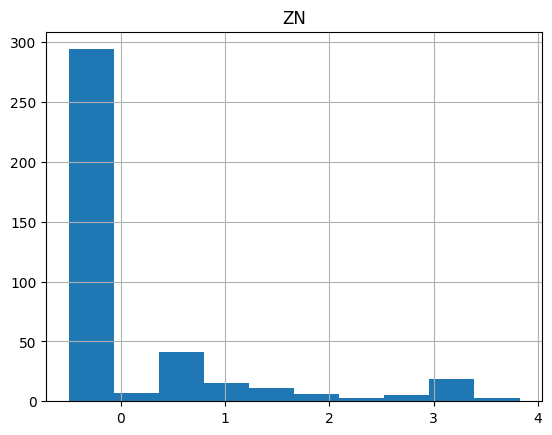

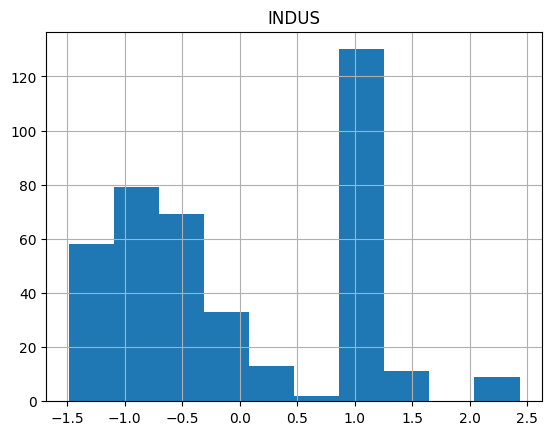

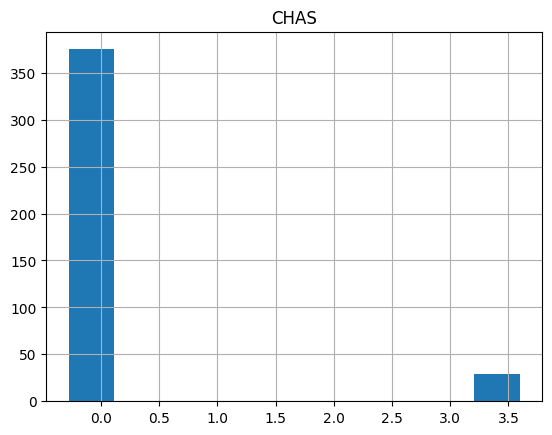

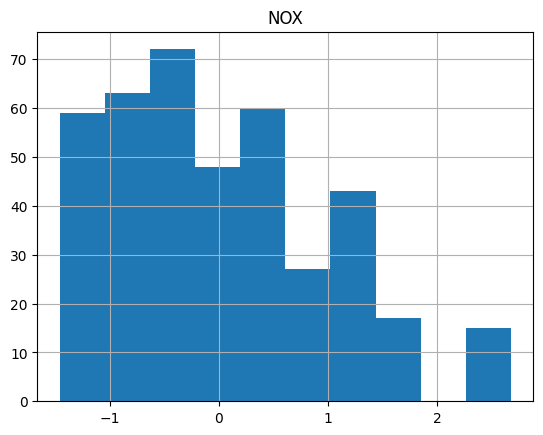

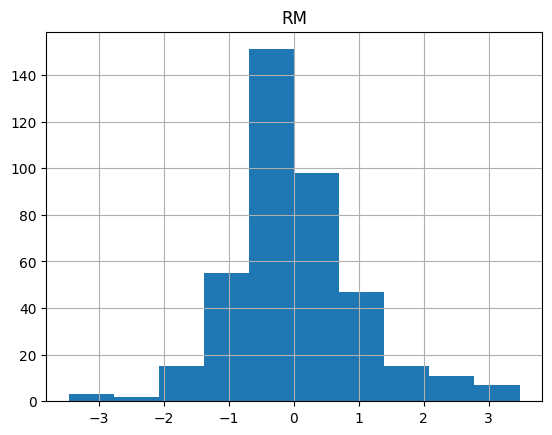

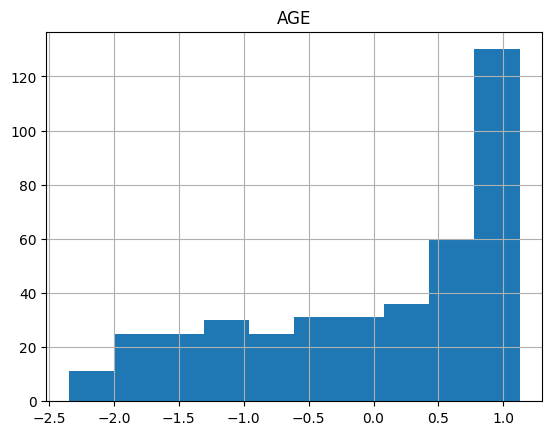

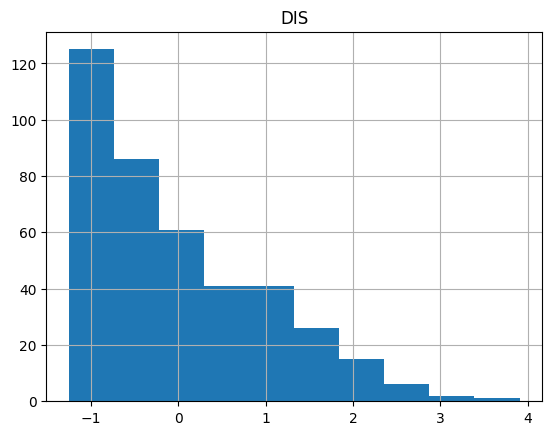

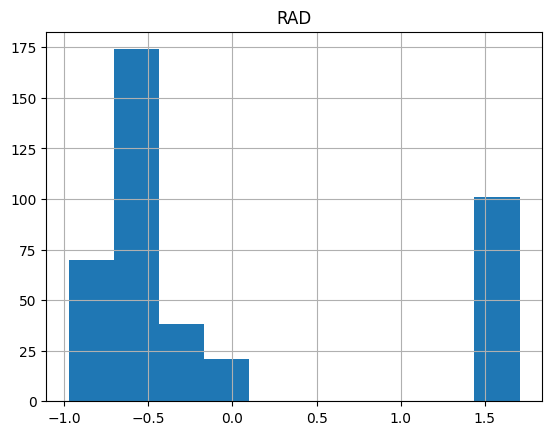

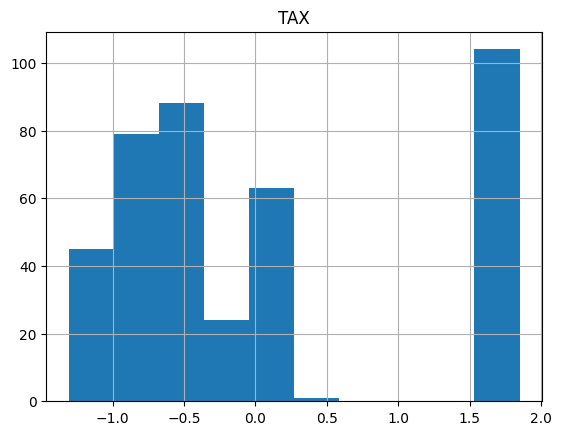

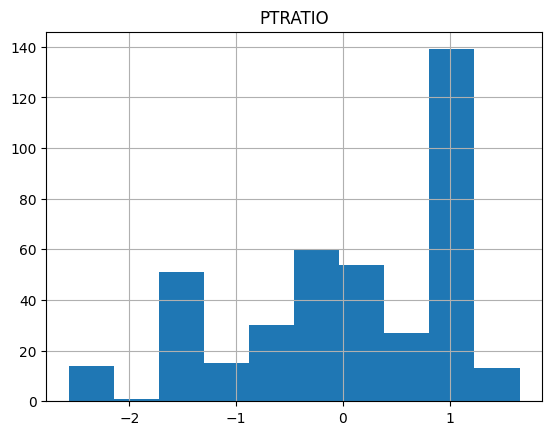

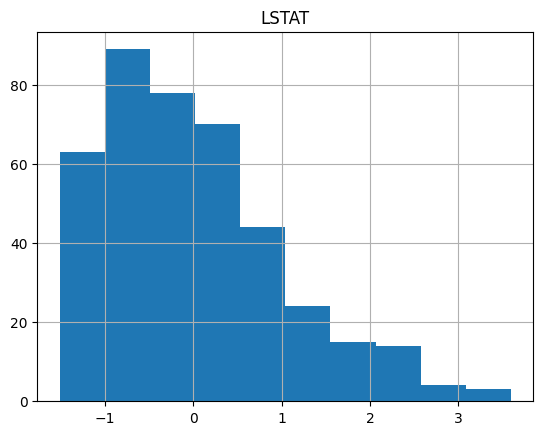

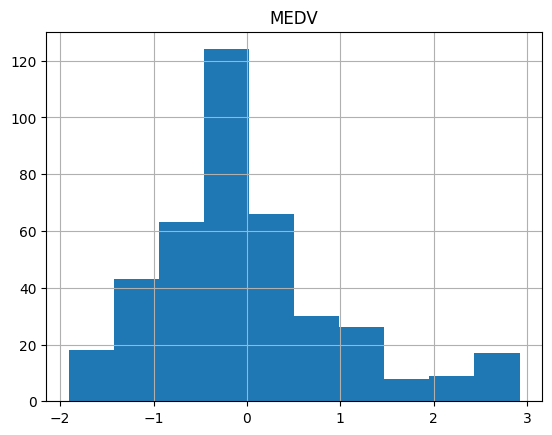

In [19]:
for columna in train_set.columns:
    train_set.hist(columna)

Construimos el modelo de regresión lineal

In [20]:
# Ahora creamos las variables X,y para los datos de entrenamiento tras todo el trabajo previo

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']

X = train_set[features].copy()
y = train_set[target]

In [21]:
# Creamos el modelo de regresión lineal

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [22]:
# Entrenamos el modelo

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [23]:
# Comprobamos el w0

lin_reg.intercept_

np.float64(4.1133954944083417e-16)

In [24]:
# Y los coeficientes

lin_reg.coef_

array([-0.12096587,  0.07640171,  0.01865308,  0.08445302, -0.22934159,
        0.3223422 , -0.01078261, -0.33468475,  0.22089778, -0.20077236,
       -0.21370658, -0.40973969])

In [25]:
# Vemos los coeficientes mejor en formato matriz

coef_df = pd.DataFrame(lin_reg.coef_, X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-0.120966
ZN,0.076402
INDUS,0.018653
CHAS,0.084453
NOX,-0.229342
RM,0.322342
AGE,-0.010783
DIS,-0.334685
RAD,0.220898
TAX,-0.200772


*Mantenemos los coeficientes y la importancia obtenida de las features*

In [26]:
# Antes de continuar vamos a regularizar los datos de X_test, en concreto la estandarización que hemos aplicado al X_train

for columna in test_set.columns:
    test_set[columna] = std_scaler.fit_transform(test_set[[columna]])

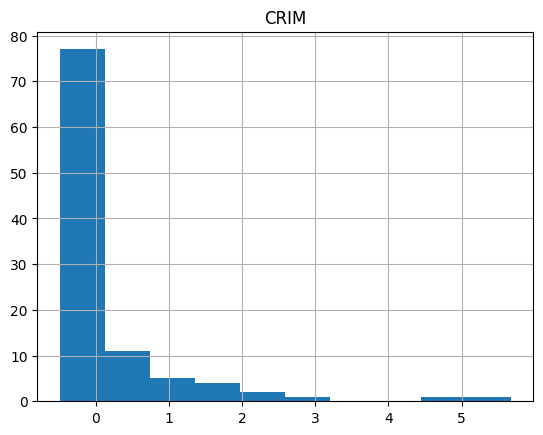

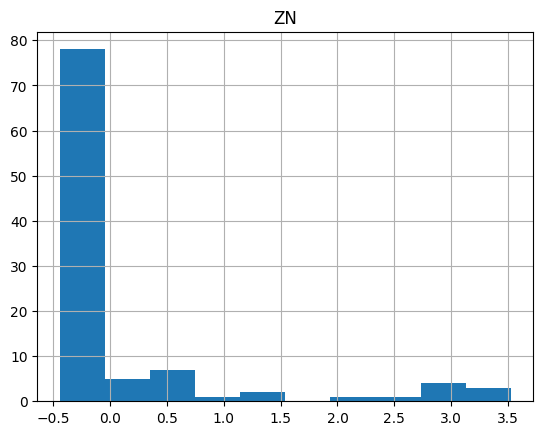

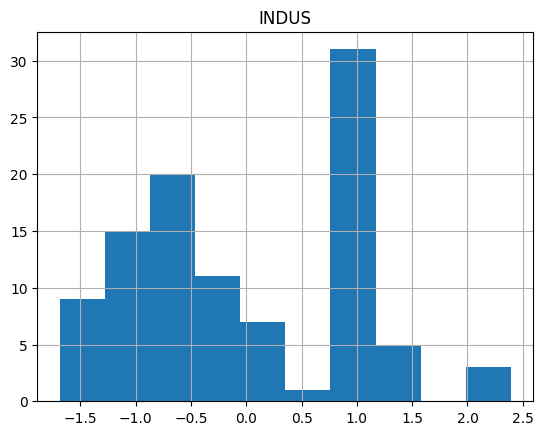

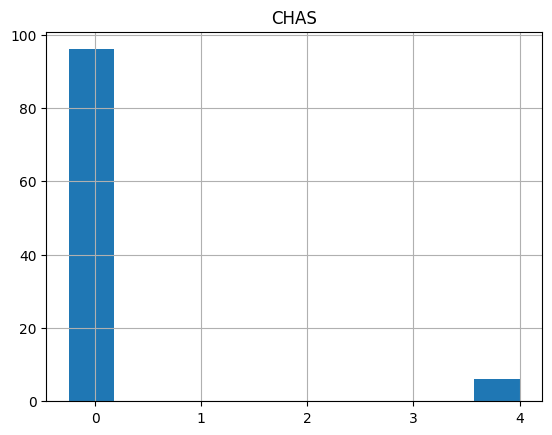

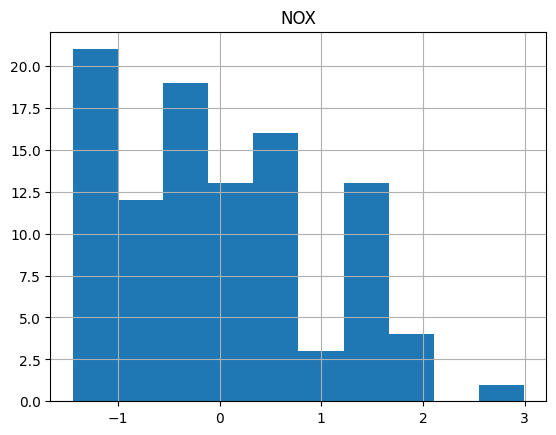

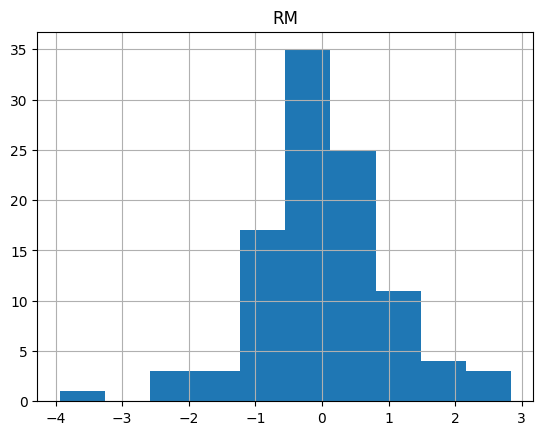

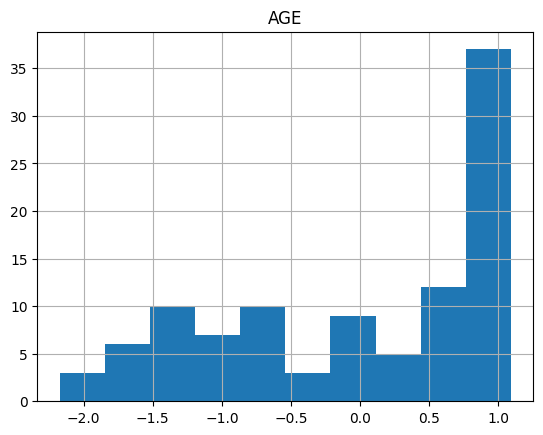

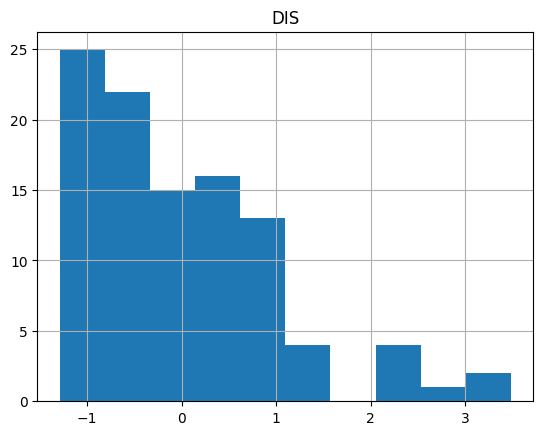

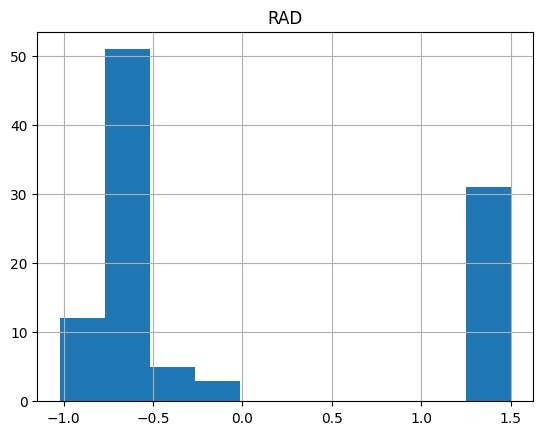

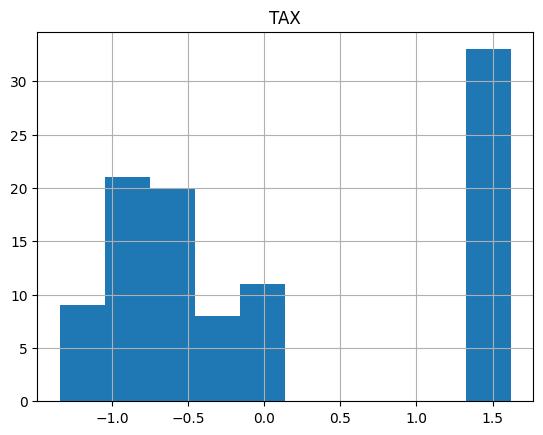

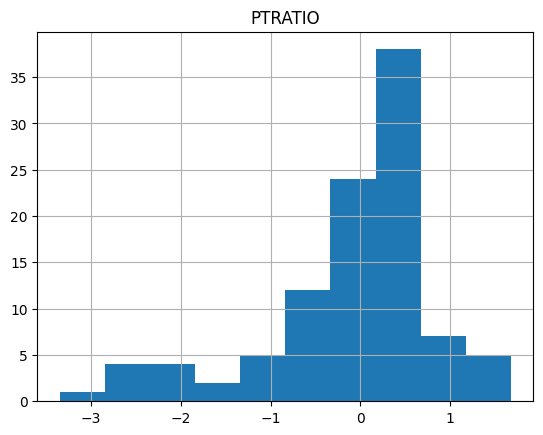

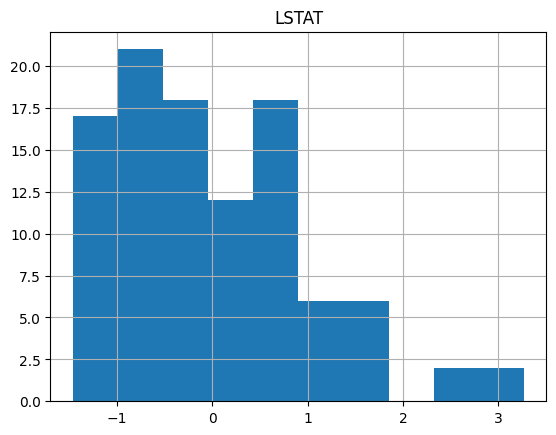

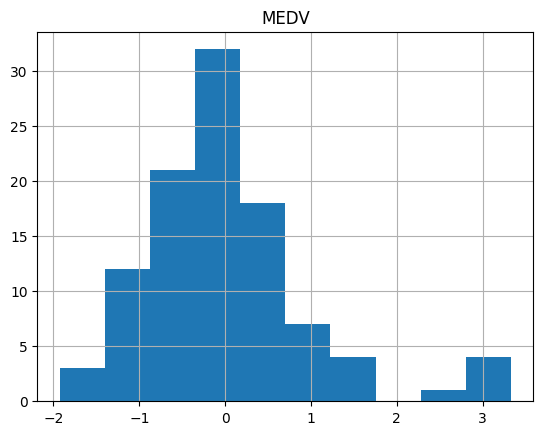

In [27]:
for columna in test_set.columns:
    test_set.hist(columna)

In [28]:
# Ahora creamos las variables X,y para los datos de test tras todo el trabajo previo

X_test = test_set[features].copy()
y_test = test_set[target]

In [29]:
# Importamos las métricas

from sklearn import metrics

In [30]:
# Train error

pred_train = lin_reg.predict(X)

print('MAE train', metrics.mean_absolute_error(y, pred_train))
print('MSE train', metrics.mean_squared_error(y, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y, pred_train)))
print('R2 train', lin_reg.score(X,y))

MAE train 0.3674090009282382
MSE train 0.26019800631826895
RMSE train 0.510096075576228
R2 train 0.739801993681731


In [31]:
# Test error

predictions = lin_reg.predict(X_test)

print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lin_reg.score(X_test,y_test))

MAE test 0.3674854335851515
MSE test 0.3092221518586687
RMSE test 0.5560774692960223
R2 test 0.6907778481413313


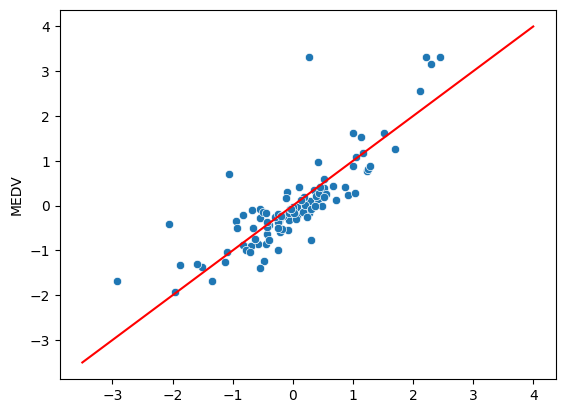

In [32]:
sns.scatterplot(x=predictions,y=y_test);
plt.plot([-3.5,4],[-3.5,4],'red')
plt.show()

*La generabilidad del modelo es buena ya que las métricas en el train y en el test son bastante similares* \
*Parece ser que el modelo es razonablemente bueno*

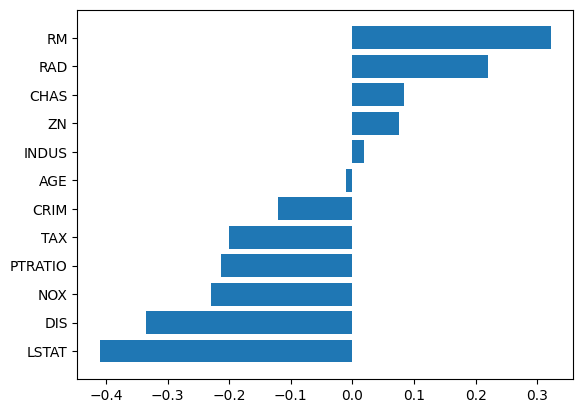

In [33]:
# Comprobamos la importancia de las variables ahora que los datos previos al entrenamiento están estandarizados

features = coef_df.sort_values('Coefficient')
plt.barh(features.index,features.Coefficient)
plt.show()

*Las vriables que más repercuten en el modelo son:*

*En negativo: "LSTAT" y "DIS"* \
*En positivo: "RM y "RAD"*

Vamos a regularizar con el modelo de Regresion Ridge

In [34]:
from sklearn.linear_model import Ridge

In [35]:
# Probamos con un alpha = 10

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X, y)

Ridge(alpha=10)

In [36]:
print("Train MSE sin regularización:", round(metrics.mean_squared_error(y, lin_reg.predict(X)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y, ridgeR.predict(X)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 0.26
Test MSE sin regularización: 0.31
Train MSE: 0.26
Test MSE: 0.31


In [37]:
# Probamos con un alpha = 50

ridgeR = Ridge(alpha = 50) # alpha es lambda 
ridgeR.fit(X, y)

Ridge(alpha=50)

In [38]:
print("Train MSE sin regularización:", round(metrics.mean_squared_error(y, lin_reg.predict(X)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y, ridgeR.predict(X)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 0.26
Test MSE sin regularización: 0.31
Train MSE: 0.27
Test MSE: 0.33


In [39]:
# Probamos con un alpha = 200

ridgeR = Ridge(alpha = 200) # alpha es lambda 
ridgeR.fit(X, y)

Ridge(alpha=200)

In [40]:
print("Train MSE sin regularización:", round(metrics.mean_squared_error(y, lin_reg.predict(X)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y, ridgeR.predict(X)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 0.26
Test MSE sin regularización: 0.31
Train MSE: 0.31
Test MSE: 0.35


*Nos quedamos con el modelo sin estandarizar ya que ofrece los mismos resultados que con la estandarización con Ridge* \
*Sin embargo, se podría probar con regressión LASSO o Elastic Net para comprobar que resultados ofrece el modelo*